## Lending Club Case Study

In [1]:
#import libraries
import pandas as pd

In [2]:
# read the dataset into a data frame

df = pd.read_csv('./loan.csv',parse_dates = ['next_pymnt_d'])

Get first look at the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

Get initial meta data for columns such as null and unique values

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## DATA CLEANUP


# Fixing Rows
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Delete incorrect rows      | No such rows found       |
| Delete summary rows   | No such rows found        |
| Delete extra rows   | No such rows found        |

After manual checking of csv, no such rows found

# Fixing Columns
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Add column names if missing      | No such columns found       |
| Rename columns   | No such columns found        |
| Delete unnecessary columns   | Columns with all empty values found        |
| Split columns for more data   | URL and date columns can be split, desc column has a date if required        |
| Merge columns for identifiers   | No such columns found        |
| Align misaligned columns   | No such columns found        |

In [9]:
# dropping columns which have no data
df.dropna(axis=1,how='all',inplace=True)
df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

# Fix Missing Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Set values as missing values      | No such values found       |
| Delete rows, columns with significant missing values   | Two columns with more than 85% missing values identified       |
| Fill partial missing values using business judgement   | No such opportunity identified      |

In [10]:
# dropping columns with more than 85% missing values
df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_pymnt                       0
total_acc                         0
total_pymnt_inv                   0
recoveries                        0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
pub_rec                           0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq              

# Standardising Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Standardise units      |  Unit symbols - (months, %) can be removed   |
| Scale values if required   |   All units have proper scale     |
| Standardise precision   | Decimal precision can be brought to two decimal places     |
| Remove outliers   |      |

In [11]:
# remove unit symbols
df['term'] = df['term'].apply(lambda x: int(x.replace('months','').replace(' ','')))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))

In [12]:
# standardise decimal places
df.round({'funded_amnt_inv': 2, 'total_pymnt':2, 'total_rec_late_fee':2, 'total_pymnt_inv':2})

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Invalid Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Encode unicode properly     |  All values are encoded correctly   |
| Convert incorrect data types   |    Data types have been fixed for int_rate, revol_util, term   |
| Correct values that go beyond range   | No such values found     |
| Correct values not in the list   |    No such values found  |
| Correct wrong structure   |  No such values found    |
| Validate internal rules   |  No such rules provided    |

# Filtering Data
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Deduplicate data     |  No such rows found   |
| Filter rows   |  Only "Charged Off" loans are required for analysis     |
| Filter columns   | loan_amnt,  term, int_rate, grade, sub_grade,  annual_inc, purpose, dti, emp_length, issue_d, home_ownership,  verification_status |

In [13]:
# checking for duplicate rows
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [20]:
# filtering bad loans
charged_off_loans_df = df[(df["loan_status"] == "Charged Off")]
charged_off_loans_df["loan_status"].value_counts()

Charged Off    5627
Name: loan_status, dtype: int64

# Univariate Analysis

Analyzing each variable independently to reveal insights.

In [22]:
# importing libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

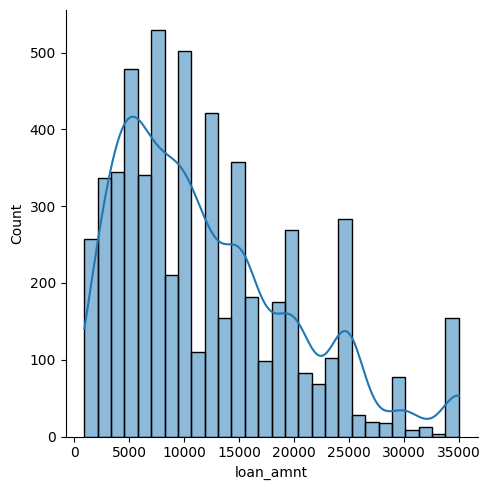

In [25]:
# loan amount
sns.displot(data=charged_off_loans_df, x="loan_amnt", kde=True)

In [26]:
charged_off_loans_df["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## loan amount insights
- amounts range from 900 to 35000
- most asked loans are around 12000

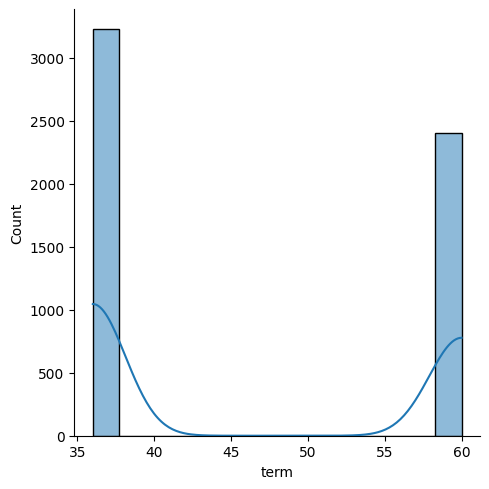

In [27]:
# term
sns.displot(data=charged_off_loans_df, x="term", kde=True)

In [29]:
charged_off_loans_df["term"].value_counts()

36    3227
60    2400
Name: term, dtype: int64

## term insights
- among the charged off loans, only two term durations were applied for
  - 3 years
  - 5 years

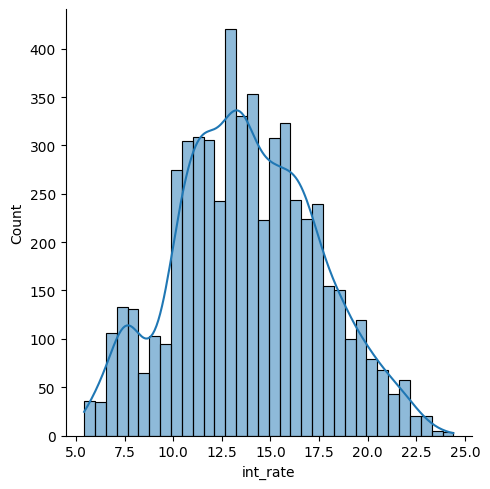

In [30]:
# int_rate
sns.displot(data=charged_off_loans_df, x="int_rate", kde=True)

In [31]:
charged_off_loans_df["int_rate"].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

## interest rate insights
- interest rates start from 5.4% and go all the way up to 24%
- most loans have an interest rate of around 10 to 15%

In [ ]:
# grade